# Closeness centrality

## Langkah 1: Crawl data judul berita dan isi berita dari Bola.net

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

# URL yang akan di-crawl
base_url = "https://indeks.kompas.com/?site=bola&date="
start_date = "2023-10-01"
end_date = "2023-10-30"

# Membuat list untuk menyimpan data
data = []

# Fungsi untuk mengambil data berita dari halaman web
def crawl_kompas_news(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Cari semua elemen dengan kelas 'article__list__title'
    news_elements = soup.find_all("div", class_="article__list__title")

    for element in news_elements:
        # Dapatkan judul dan tautan berita
        title = element.h3.a.text
        link = element.h3.a["href"]

        # Crawl isi berita dari tautan judul
        article_text = crawl_kompas_article(link)

        # Tambahkan data ke list
        data.append({"Judul": title, "Isi Berita": article_text})

# Fungsi untuk mengambil isi berita dari tautan judul berita
def crawl_kompas_article(article_url):
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Cari elemen dengan kelas 'read__content'
    content_element = soup.find("div", class_="read__content")

    # Dapatkan isi berita
    article_text = content_element.get_text()

    return article_text

# Loop untuk tanggal dari start_date hingga end_date
current_date = datetime.strptime(start_date, "%Y-%m-%d")  # Konversi tanggal awal ke objek datetime
end_date = datetime.strptime(end_date, "%Y-%m-%d")  # Konversi tanggal akhir ke objek datetime

while current_date <= end_date:
    current_url = f"{base_url}{current_date.strftime('%Y-%m-%d')}"  # Menggunakan strftime untuk format tanggal
    print(f"Mengambil berita untuk tanggal {current_date.strftime('%Y-%m-%d')}")
    crawl_kompas_news(current_url)

    # Lanjut ke tanggal berikutnya
    current_date += timedelta(days=1)



Mengambil berita untuk tanggal 2023-10-01
Mengambil berita untuk tanggal 2023-10-02
Mengambil berita untuk tanggal 2023-10-03
Mengambil berita untuk tanggal 2023-10-04
Mengambil berita untuk tanggal 2023-10-05
Mengambil berita untuk tanggal 2023-10-06
Mengambil berita untuk tanggal 2023-10-07
Mengambil berita untuk tanggal 2023-10-08
Mengambil berita untuk tanggal 2023-10-09
Mengambil berita untuk tanggal 2023-10-10
Mengambil berita untuk tanggal 2023-10-11
Mengambil berita untuk tanggal 2023-10-12
Mengambil berita untuk tanggal 2023-10-13
Mengambil berita untuk tanggal 2023-10-14
Mengambil berita untuk tanggal 2023-10-15
Mengambil berita untuk tanggal 2023-10-16
Mengambil berita untuk tanggal 2023-10-17
Mengambil berita untuk tanggal 2023-10-18
Mengambil berita untuk tanggal 2023-10-19
Mengambil berita untuk tanggal 2023-10-20
Mengambil berita untuk tanggal 2023-10-21
Mengambil berita untuk tanggal 2023-10-22
Mengambil berita untuk tanggal 2023-10-23
Mengambil berita untuk tanggal 202

In [4]:
# Membuat dataframe pandas dari data
df = pd.DataFrame(data)

# Menyimpan dataframe ke dalam file CSV
df.to_csv("berita_kompas.csv", index=False)


In [5]:
df

,Judul,Isi Berita
0,"Persib Vs Persita, Bojan Hodak Tak Sangka Maun...","\n\nBANDUNG, KOMPAS.com - Persib Bandung melib..."
1,"Liga Indonesia Diwarnai Pemain Kolaps, APPI In...",\n\nKOMPAS.com – Asosiasi Pesepak Bola Profesi...
2,"Link Live Streaming Atalanta Vs Juventus, Kick...",\n\nKOMPAS.com – Juventus bakal bertandang ke ...
3,"Klasemen Liga 1: Persib Melesat ke 3 Besar, Bo...",\n\nKOMPAS.com – Klasemen Liga 1 menempatkan P...
4,Hasil Persib Vs Persita 5-0: David Da Silva Ha...,\n\nKOMPAS.com - Hattrick David Da Silva memba...
...,...,...
445,"Man United Digilas Man City di Old Trafford, K...",\n\nKOMPAS.com - Man United kalah telak 0-3 da...
446,"Link Live Streaming Ballon d'Or 2023, Malam Ini",\n\nKOMPAS.com - Malam penganugerahan Ballon d...
447,"Lihat Inter Menang lalu Milan Ditahan Napoli, ...",\n\nKOMPAS.com - Olivier Giroud murka dengan h...
448,Ballon d'Or 2023: Messi dan Haaland Layak Mena...,\n\nKOMPAS.com - Pep Guardiola menyebut Lionel...


In [14]:
df.to_csv("berita_bola.csv", index=False)

## Langkah 2: Ekstraksi Kalimat (NLTK)

In [4]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/ppw/tugas/tugas-ppw/berita_bola.csv")
df

,Judul,Isi Berita
0,"Persib Vs Persita, Bojan Hodak Tak Sangka Maun...","\n\nBANDUNG, KOMPAS.com - Persib Bandung melib..."
1,"Liga Indonesia Diwarnai Pemain Kolaps, APPI In...",\n\nKOMPAS.com – Asosiasi Pesepak Bola Profesi...
2,"Link Live Streaming Atalanta Vs Juventus, Kick...",\n\nKOMPAS.com – Juventus bakal bertandang ke ...
3,"Klasemen Liga 1: Persib Melesat ke 3 Besar, Bo...",\n\nKOMPAS.com – Klasemen Liga 1 menempatkan P...
4,Hasil Persib Vs Persita 5-0: David Da Silva Ha...,\n\nKOMPAS.com - Hattrick David Da Silva memba...
...,...,...
445,"Man United Digilas Man City di Old Trafford, K...",\n\nKOMPAS.com - Man United kalah telak 0-3 da...
446,"Link Live Streaming Ballon d'Or 2023, Malam Ini",\n\nKOMPAS.com - Malam penganugerahan Ballon d...
447,"Lihat Inter Menang lalu Milan Ditahan Napoli, ...",\n\nKOMPAS.com - Olivier Giroud murka dengan h...
448,Ballon d'Or 2023: Messi dan Haaland Layak Mena...,\n\nKOMPAS.com - Pep Guardiola menyebut Lionel...


In [6]:
berita = df['Isi Berita'].iloc[1]
print(berita)



KOMPAS.com – Asosiasi Pesepak Bola Profesional Indonesia (APPI) merilis pernyataan mengenai insiden di Liga 1 dan Liga 2 yang menyebabkan pemain kolaps saat pertandingan.
Terbaru, bek Dewa United, Ady Setiawan, tumbang di lapangan seusai bersinggungan dengan pemain Persebaya, Arief Catur Pemungkas.
Saat itu, Arief Catur melakukan pelanggaran keras terhadap Ady Setiawan. Ia kedapatan menyikut kepala belakang Adi Setiawan.
Aksi tak sportif Catur membuat Ady tumbang. Ady pun sempat mendapatkan penanganan medis, sebelum dibawa menggunakan ambulans.
Baca juga: Dewa United Vs Persebaya: Ady Setiawan Kolaps, Arief Catur Jenguk ke RS dan Minta Maaf
APPI buka suara mengenai insiden yang membuat pesepak bola Liga 1 dan Liga 2 mengalami kolaps di lapangan.
"Hal-hal yang berpotensi menimbulkan insiden yang tidak diharapkan dapat dicegah dengan sedemikian rupa," tulis pernyataan resmi APPI.
"Sportivitas antar pesepak bola, ketegasan penyelenggara serta perangkat laga, dan kecekatan tim medis di l

In [7]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=7c49feebb14364f452abc588cd0dfa7d81afdf348ccee0bccde70853717aea0b
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [8]:
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Langkah 3: TF IDF

In [9]:
kalimat = nltk.sent_tokenize(berita)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()

for i, sentence in enumerate(kalimat):
    print(f"\nKalimat {i+1}: {sentence}")
    for j, term in enumerate(terms):
        tfidf_value = tfidf_matrix[i, j]
        if tfidf_value > 0:
            print(f"{term}: {tfidf_value:.4f}")


Kalimat 1: 

KOMPAS.com – Asosiasi Pesepak Bola Profesional Indonesia (APPI) merilis pernyataan mengenai insiden di Liga 1 dan Liga 2 yang menyebabkan pemain kolaps saat pertandingan.
appi: 0.1544
asosiasi: 0.2511
bola: 0.1544
com: 0.1976
dan: 0.1544
di: 0.1350
indonesia: 0.2198
insiden: 0.1976
kolaps: 0.1976
kompas: 0.1976
liga: 0.4396
mengenai: 0.2198
menyebabkan: 0.2198
merilis: 0.2511
pemain: 0.1976
pernyataan: 0.2198
pertandingan: 0.2511
pesepak: 0.1663
profesional: 0.2511
saat: 0.1804
yang: 0.1268

Kalimat 2: Terbaru, bek Dewa United, Ady Setiawan, tumbang di lapangan seusai bersinggungan dengan pemain Persebaya, Arief Catur Pemungkas.
ady: 0.1844
arief: 0.2155
bek: 0.3000
bersinggungan: 0.3000
catur: 0.1987
dengan: 0.2361
dewa: 0.2361
di: 0.1612
lapangan: 0.1987
pemain: 0.2361
pemungkas: 0.3000
persebaya: 0.2155
setiawan: 0.1987
seusai: 0.3000
terbaru: 0.3000
tumbang: 0.2361
united: 0.2361

Kalimat 3: Saat itu, Arief Catur melakukan pelanggaran keras terhadap Ady Setiawan.
ady:

### Cosine Similarity

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)):
        similarity = cosine_similarities[i][j]
        print(f"Similarity Kalimat {i+1} dan Kalimat {j+1}: {similarity:.4f}")

Similarity Kalimat 1 dan Kalimat 2: 0.0684
Similarity Kalimat 1 dan Kalimat 3: 0.0505
Similarity Kalimat 1 dan Kalimat 4: 0.0000
Similarity Kalimat 1 dan Kalimat 5: 0.0000
Similarity Kalimat 1 dan Kalimat 6: 0.0000
Similarity Kalimat 1 dan Kalimat 7: 0.4125
Similarity Kalimat 1 dan Kalimat 8: 0.1444
Similarity Kalimat 1 dan Kalimat 9: 0.0955
Similarity Kalimat 1 dan Kalimat 10: 0.2004
Similarity Kalimat 1 dan Kalimat 11: 0.0842
Similarity Kalimat 1 dan Kalimat 12: 0.0176
Similarity Kalimat 1 dan Kalimat 13: 0.1884
Similarity Kalimat 1 dan Kalimat 14: 0.0402
Similarity Kalimat 1 dan Kalimat 15: 0.0664
Similarity Kalimat 1 dan Kalimat 16: 0.1274
Similarity Kalimat 1 dan Kalimat 17: 0.0996
Similarity Kalimat 1 dan Kalimat 18: 0.0263
Similarity Kalimat 2 dan Kalimat 3: 0.2073
Similarity Kalimat 2 dan Kalimat 4: 0.0528
Similarity Kalimat 2 dan Kalimat 5: 0.1961
Similarity Kalimat 2 dan Kalimat 6: 0.0386
Similarity Kalimat 2 dan Kalimat 7: 0.2561
Similarity Kalimat 2 dan Kalimat 8: 0.0470
Si

In [12]:
similarity_df = pd.DataFrame(cosine_similarities, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,0.068406,0.050542,0.000000,0.000000,0.000000,0.412537,0.144445,0.095493,0.200393,0.084226,0.017613,0.188361,0.040209,0.066371,0.127393,0.099591,0.026330
1,0.068406,1.000000,0.207260,0.052803,0.196138,0.038621,0.256116,0.047000,0.055947,0.053558,0.362395,0.000000,0.000000,0.000000,0.071879,0.000000,0.022503,0.031456
2,0.050542,0.207260,1.000000,0.068671,0.145058,0.050227,0.138700,0.000000,0.051608,0.098809,0.173315,0.000000,0.050631,0.075631,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.052803,0.068671,1.000000,0.000000,0.000000,0.035336,0.000000,0.000000,0.075505,0.034193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.196138,0.145058,0.000000,1.000000,0.058629,0.144706,0.000000,0.000000,0.000000,0.127011,0.000000,0.000000,0.071335,0.059524,0.000000,0.000000,0.000000
5,0.000000,0.038621,0.050227,0.000000,0.058629,1.000000,0.025846,0.000000,0.054083,0.051774,0.065986,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,0.000000
6,0.412537,0.256116,0.138700,0.035336,0.144706,0.025846,1.000000,0.076561,0.118373,0.205539,0.293063,0.042564,0.073197,0.032147,0.112804,0.047629,0.015059,0.021051
7,0.144445,0.047000,0.000000,0.000000,0.000000,0.000000,0.076561,1.000000,0.000000,0.055151,0.055509,0.142128,0.095930,0.105885,0.101238,0.000000,0.000000,0.000000
8,0.095493,0.055947,0.051608,0.000000,0.000000,0.054083,0.118373,0.000000,1.000000,0.192379,0.122126,0.054032,0.085931,0.040163,0.020454,0.030415,0.019233,0.098209
9,0.200393,0.053558,0.098809,0.075505,0.000000,0.051774,0.205539,0.055151,0.192379,1.000000,0.160689,0.059013,0.159579,0.116200,0.032796,0.029116,0.018412,0.025737


### Graph

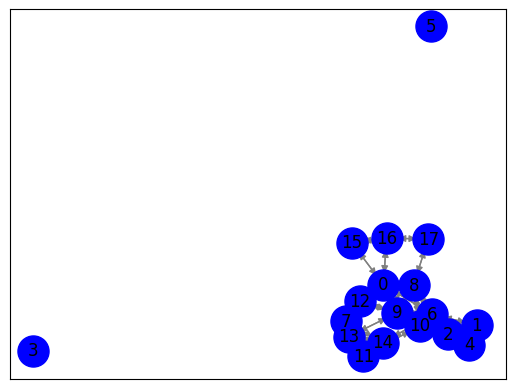

In [18]:
G = nx.DiGraph()
for i in range(len(cosine_similarities)):
    G.add_node(i)

for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.08 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

### Closeness Centrality

In [30]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 1: 0.2250
Node 8: 0.2250
Node 0: 0.1500
Node 4: 0.1500
Node 2: 0.1000
Node 3: 0.1000
Node 6: 0.1000
Node 10: 0.1000
Node 5: 0.0000
Node 7: 0.0000
Node 9: 0.0000


In [31]:
print("\nTiga Node Tertinggi dengan Kalimat:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Tiga Node Tertinggi dengan Kalimat:
Node 1: Closeness Centrality = 0.2250
Kalimat: Hasil Persib vs Persita berkesudahan dengan skor 5-0 di Stadion Gelora Bandung Lautan Api (GBLA), Minggu (1/10/2023) malam.

Node 8: Closeness Centrality = 0.2250
Kalimat: Baca juga: Hasil Persib Vs Persita 5-0: David Da Silva Hattrick, Maung Tembus 4 Besar
Pelatih asal Kroasia itu mengapresiasi para pemainnya Maung Bandung, julukan Persib.

Node 0: Closeness Centrality = 0.1500
Kalimat: 

BANDUNG, KOMPAS.com - Persib Bandung melibas tamunya, Persita Tangerang, dalam pertandingan pekan ke-14 Liga 1 2023-2024.

